<a href="https://colab.research.google.com/github/giakhangle/phantichdulieu/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load the dataset
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [25]:
X_test.shape

(10000, 32, 32, 3)

In [24]:
y_train.shape

(50000,)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [43]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [42]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2)) #thu nhỏ hình ảnh
    plt.imshow(X[index]) #xuất hình ảnh
    plt.xlabel(classes[y[index]]) #dán nhãn

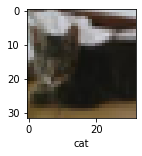

In [15]:
plot_sample(X_train, y_train, 9)

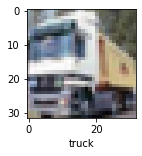

In [23]:
plot_sample(X_train, y_train, 1)

In [41]:
#Chuẩn hóa dữ liệu
X_train = X_train / 255.0
X_test = X_test / 255.0

In [44]:
#Xây dựng mạng nơron nhân tạo đơn giản để phân loại hình ảnh
#Training & building mô hình
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 106s 68ms/step - loss: 1.8149 - accuracy: 0.3547
Epoch 2/5
1563/1563 [==============================] - 104s 67ms/step - loss: 1.6257 - accuracy: 0.4262
Epoch 3/5
1563/1563 [==============================] - 104s 66ms/step - loss: 1.5442 - accuracy: 0.4538
Epoch 4/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4848 - accuracy: 0.4751
Epoch 5/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4328 - accuracy: 0.4952


In [28]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
#Xây dựng CNN
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [31]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 2.1235 - accuracy: 0.3526
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.3447 - accuracy: 0.5252
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1994 - accuracy: 0.5780
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0967 - accuracy: 0.6146
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0115 - accuracy: 0.6477
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9483 - accuracy: 0.6706
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8919 - accuracy: 0.6900
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8490 - accuracy: 0.7026
Epoch 9/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.8030 - accuracy: 0.7211
Epoch 10/10
1563/1563 [==============================] - 62s 40m

In [34]:
cnn.evaluate(X_test,y_test) #Tính độ chính xác

313/313 [==============================] - 4s 13ms/step - loss: 1.3830 - accuracy: 0.6443


[1.3830146789550781, 0.6442999839782715]

In [35]:
#Dự đoán
y_zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzpred = cnn.predict(X_test)
y_pred[:5]

array([[1.6832177e-03, 5.3923967e-04, 4.9006063e-03, 8.9177424e-01,
        5.6283846e-02, 3.0454105e-02, 1.1662923e-02, 5.2261190e-04,
        9.0763305e-04, 1.2715947e-03],
       [3.9369870e-02, 8.0288792e-06, 1.0624019e-10, 1.1686198e-10,
        1.7433768e-12, 3.6520276e-11, 1.0406525e-12, 6.5430612e-14,
        9.6062183e-01, 2.5434090e-07],
       [4.7887224e-01, 1.3973092e-03, 1.5763866e-03, 2.2481426e-03,
        5.9151271e-04, 2.9094805e-04, 1.3409684e-04, 1.2474314e-04,
        5.0812942e-01, 6.6351676e-03],
       [6.1573636e-02, 1.3134378e-07, 1.9544166e-07, 8.0836189e-06,
        4.8299601e-08, 3.9510187e-08, 1.1839623e-08, 2.7871994e-08,
        9.3841541e-01, 2.3893513e-06],
       [2.8155812e-06, 3.1833093e-07, 1.1561908e-03, 4.9316452e-04,
        4.7899538e-04, 7.6385397e-05, 9.9779010e-01, 1.1382097e-06,
        7.1317707e-08, 7.3186129e-07]], dtype=float32)

In [36]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 6]

In [37]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

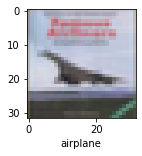

In [38]:
plot_sample(X_test, y_test,3)

In [39]:
classes[y_classes[3]]

'ship'

In [40]:
classes[y_classes[3]]

'ship'